In [25]:
# Import required libraries
%pip install optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import optuna

# For models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Set constant seed for reproducibility
SEED = 42
np.random.seed(SEED)
# Remove optuna.seed(SEED) as it does not exist

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [26]:
# Downgrade numpy for TensorFlow compatibility (run this cell and restart kernel)
%pip install numpy==1.26.4

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [27]:
# Load dataset and select top 14 features
features = [
    'RiskScore', 'MonthlyCharges', 'AvgChargesPerMonth', 'ContractRisk', 'Contract',
    'TotalServices', 'TotalCharges', 'EstimatedCLV', 'HasFamily', 'tenure',
    'Partner', 'HighValueCustomer', 'PaymentRisk', 'Dependents'
]
df = pd.read_csv('final_telco_engineered.csv')
X = df[features]
# Assuming target column is 'Churn' (update if different)
y = df['Churn']

In [28]:
# Identify categorical and numerical columns for preprocessing
categorical_cols = ['Contract', 'HasFamily', 'Partner', 'HighValueCustomer', 'Dependents']
numerical_cols = [col for col in features if col not in categorical_cols]

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

In [29]:
# Train/validation/test split (80/10/10)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.10, random_state=SEED, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, random_state=SEED, stratify=y_temp)
# 0.1111 * 0.90 ≈ 0.10

In [30]:
# Ensure target variable is numeric (0/1)
if y_train.dtype == 'O' or y_train.dtype.name == 'category':
    y_train = y_train.map({'No': 0, 'Yes': 1}).astype(int)
    y_val = y_val.map({'No': 0, 'Yes': 1}).astype(int)
    y_test = y_test.map({'No': 0, 'Yes': 1}).astype(int)

In [31]:
# Fit preprocessor and transform data
X_train_proc = preprocessor.fit_transform(X_train)
X_val_proc = preprocessor.transform(X_val)
X_test_proc = preprocessor.transform(X_test)

[I 2025-10-12 18:53:34,192] A new study created in memory with name: no-name-a9270830-5ba1-4821-97e4-29f2874d1f8b


Note: you may need to restart the kernel to use updated packages.


Best trial: 0. Best value: 0.15715:   5%|▌         | 1/20 [00:17<05:40, 17.92s/it]

[I 2025-10-12 18:53:52,114] Trial 0 finished with value: 0.15715008974075317 and parameters: {'n_units': 58, 'lr': 0.007969454818643935, 'dropout': 0.36599697090570255, 'batch_size': 90}. Best is trial 0 with value: 0.15715008974075317.


Best trial: 0. Best value: 0.15715:  10%|█         | 2/20 [00:45<07:01, 23.41s/it]

[I 2025-10-12 18:54:19,358] Trial 1 finished with value: 0.15864700078964233 and parameters: {'n_units': 33, 'lr': 0.00020511104188433984, 'dropout': 0.02904180608409973, 'batch_size': 116}. Best is trial 0 with value: 0.15715008974075317.


Best trial: 0. Best value: 0.15715:  15%|█▌        | 3/20 [00:56<05:01, 17.74s/it]

[I 2025-10-12 18:54:30,351] Trial 2 finished with value: 0.15838885307312012 and parameters: {'n_units': 83, 'lr': 0.0026070247583707684, 'dropout': 0.010292247147901223, 'batch_size': 126}. Best is trial 0 with value: 0.15715008974075317.


Best trial: 3. Best value: 0.157057:  20%|██        | 4/20 [01:34<06:55, 25.99s/it]

[I 2025-10-12 18:55:08,997] Trial 3 finished with value: 0.15705716609954834 and parameters: {'n_units': 110, 'lr': 0.00026587543983272726, 'dropout': 0.09091248360355031, 'batch_size': 49}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  25%|██▌       | 5/20 [02:14<07:41, 30.76s/it]

[I 2025-10-12 18:55:48,218] Trial 4 finished with value: 0.15760433673858643 and parameters: {'n_units': 50, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  30%|███       | 6/20 [02:53<07:51, 33.68s/it]

[I 2025-10-12 18:56:27,553] Trial 5 finished with value: 0.1582547426223755 and parameters: {'n_units': 85, 'lr': 0.00019010245319870352, 'dropout': 0.14607232426760908, 'batch_size': 67}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  35%|███▌      | 7/20 [03:05<05:44, 26.49s/it]

[I 2025-10-12 18:56:39,238] Trial 6 finished with value: 0.1577540636062622 and parameters: {'n_units': 67, 'lr': 0.0037183641805732083, 'dropout': 0.09983689107917987, 'batch_size': 81}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  40%|████      | 8/20 [03:46<06:15, 31.33s/it]

[I 2025-10-12 18:57:20,922] Trial 7 finished with value: 0.16049492359161377 and parameters: {'n_units': 82, 'lr': 0.0001238513729886094, 'dropout': 0.3037724259507192, 'batch_size': 48}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  45%|████▌     | 9/20 [04:03<04:53, 26.65s/it]

[I 2025-10-12 18:57:37,276] Trial 8 finished with value: 0.15802240371704102 and parameters: {'n_units': 23, 'lr': 0.007902619549708232, 'dropout': 0.4828160165372797, 'batch_size': 110}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  50%|█████     | 10/20 [04:39<04:55, 29.54s/it]

[I 2025-10-12 18:58:13,297] Trial 9 finished with value: 0.16115045547485352 and parameters: {'n_units': 50, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  55%|█████▌    | 11/20 [05:04<04:15, 28.39s/it]

[I 2025-10-12 18:58:39,082] Trial 10 finished with value: 0.15907543897628784 and parameters: {'n_units': 122, 'lr': 0.0005338943774556114, 'dropout': 0.1843643863605487, 'batch_size': 33}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  60%|██████    | 12/20 [05:27<03:31, 26.49s/it]

[I 2025-10-12 18:59:01,211] Trial 11 finished with value: 0.15804827213287354 and parameters: {'n_units': 118, 'lr': 0.0004872311972287137, 'dropout': 0.41441700996070685, 'batch_size': 93}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  65%|██████▌   | 13/20 [05:37<02:32, 21.78s/it]

[I 2025-10-12 18:59:12,175] Trial 12 finished with value: 0.16160982847213745 and parameters: {'n_units': 104, 'lr': 0.009190992805196462, 'dropout': 0.3089722887943216, 'batch_size': 94}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  70%|███████   | 14/20 [06:11<02:31, 25.23s/it]

[I 2025-10-12 18:59:45,384] Trial 13 finished with value: 0.1581566333770752 and parameters: {'n_units': 59, 'lr': 0.0011782800596762833, 'dropout': 0.4009799030302937, 'batch_size': 46}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  75%|███████▌  | 15/20 [06:34<02:03, 24.77s/it]

[I 2025-10-12 19:00:09,062] Trial 14 finished with value: 0.15944194793701172 and parameters: {'n_units': 102, 'lr': 0.0004159565337782622, 'dropout': 0.25026599512074826, 'batch_size': 90}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  80%|████████  | 16/20 [06:52<01:30, 22.62s/it]

[I 2025-10-12 19:00:26,697] Trial 15 finished with value: 0.1585179567337036 and parameters: {'n_units': 101, 'lr': 0.002393719194281379, 'dropout': 0.10401299634338887, 'batch_size': 56}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  85%|████████▌ | 17/20 [07:21<01:13, 24.39s/it]

[I 2025-10-12 19:00:55,213] Trial 16 finished with value: 0.15867793560028076 and parameters: {'n_units': 42, 'lr': 0.004651177057081951, 'dropout': 0.4938067755869749, 'batch_size': 33}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  90%|█████████ | 18/20 [07:45<00:48, 24.48s/it]

[I 2025-10-12 19:01:19,890] Trial 17 finished with value: 0.16026782989501953 and parameters: {'n_units': 73, 'lr': 0.0003437866732826027, 'dropout': 0.3999612751508559, 'batch_size': 105}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057:  95%|█████████▌| 19/20 [08:27<00:29, 29.64s/it]

[I 2025-10-12 19:02:01,561] Trial 18 finished with value: 0.15900319814682007 and parameters: {'n_units': 18, 'lr': 0.0007752274246813069, 'dropout': 0.24854269680542626, 'batch_size': 80}. Best is trial 3 with value: 0.15705716609954834.


Best trial: 3. Best value: 0.157057: 100%|██████████| 20/20 [08:49<00:00, 26.47s/it]



[I 2025-10-12 19:02:23,537] Trial 19 finished with value: 0.15709847211837769 and parameters: {'n_units': 112, 'lr': 0.0015864781378598437, 'dropout': 0.06940641877629392, 'batch_size': 68}. Best is trial 3 with value: 0.15705716609954834.
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
FNN Test Results:
Accuracy: 0.7461
F1 Score: 0.6232
Precision: 0.5139
Recall (Sensitivity): 0.7914
Specificity: 0.7297
AUC: 0.8393
FNN Test Results:
Accuracy: 0.7461
F1 Score: 0.6232
Precision: 0.5139
Recall (Sensitivity): 0.7914
Specificity: 0.7297
AUC: 0.8393


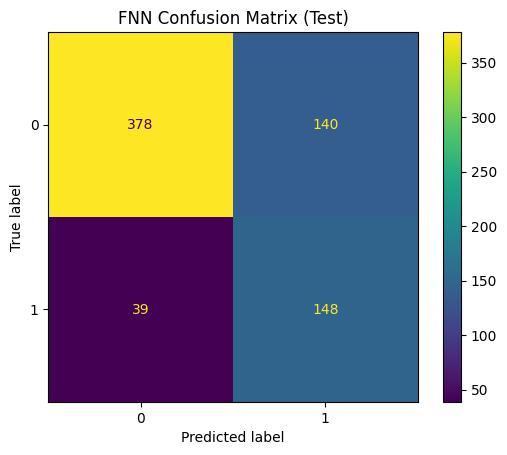

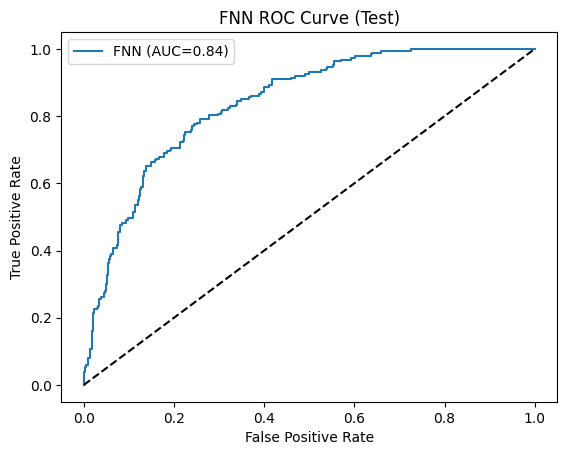

In [32]:
# Feed Forward Neural Network (FNN) with Optuna hyperparameter tuning
%pip install tensorflow-macos tensorflow-metal
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt

# Compute class weights for imbalance
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weight_dict = dict(zip(classes, class_weights))

def create_fnn_model(trial):
    n_units = trial.suggest_int('n_units', 16, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential([
        layers.Input(shape=(X_train_proc.shape[1],)),
        layers.Dense(n_units, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(1, activation='sigmoid')
    ])
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy', metrics.AUC(name='auc')])
    return model

def objective_fnn(trial):
    model = create_fnn_model(trial)
    early_stop = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
    history = model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[early_stop]
    )
    val_auc = max(history.history.get('val_auc', [0]))
    return 1 - val_auc  # Optuna minimizes

study_fnn = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_fnn.optimize(objective_fnn, n_trials=20, show_progress_bar=True)

# Train best FNN model
best_params_fnn = study_fnn.best_params
best_fnn = create_fnn_model(optuna.trial.FixedTrial(best_params_fnn))
early_stop_final = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
best_fnn.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_fnn['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[early_stop_final]
)
# Evaluate on test set
pred_test_fnn = best_fnn.predict(X_test_proc).ravel()
pred_test_label_fnn = (pred_test_fnn > 0.5).astype(int)
cm_fnn = confusion_matrix(y_test, pred_test_label_fnn)
roc_auc_fnn = roc_auc_score(y_test, pred_test_fnn)
f1_fnn = f1_score(y_test, pred_test_label_fnn)
precision_fnn = precision_score(y_test, pred_test_label_fnn)
recall_fnn = recall_score(y_test, pred_test_label_fnn)
specificity_fnn = cm_fnn[0,0] / (cm_fnn[0,0] + cm_fnn[0,1]) if (cm_fnn[0,0] + cm_fnn[0,1]) > 0 else 0
accuracy_fnn = (cm_fnn[0,0] + cm_fnn[1,1]) / cm_fnn.sum()

print('FNN Test Results:')
print(f'Accuracy: {accuracy_fnn:.4f}')
print(f'F1 Score: {f1_fnn:.4f}')
print(f'Precision: {precision_fnn:.4f}')
print(f'Recall (Sensitivity): {recall_fnn:.4f}')
print(f'Specificity: {specificity_fnn:.4f}')
print(f'AUC: {roc_auc_fnn:.4f}')

# Plot Confusion Matrix (Test)
ConfusionMatrixDisplay(cm_fnn).plot()
plt.title('FNN Confusion Matrix (Test)')
plt.show()

# Plot ROC Curve (Test)
fpr_fnn, tpr_fnn, _ = roc_curve(y_test, pred_test_fnn)
plt.figure()
plt.plot(fpr_fnn, tpr_fnn, label=f'FNN (AUC={roc_auc_fnn:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('FNN ROC Curve (Test)')
plt.legend()
plt.show()

[I 2025-10-12 19:03:08,970] A new study created in memory with name: no-name-5b0e4a70-1122-49c7-98c4-4a2a91a43721
Best trial: 0. Best value: 0.159597:   5%|▌         | 1/20 [00:34<11:00, 34.77s/it]

[I 2025-10-12 19:03:43,737] Trial 0 finished with value: 0.15959680080413818 and parameters: {'n_layers': 3, 'n_units': 124, 'lr': 0.0029106359131330704, 'dropout': 0.2993292420985183, 'batch_size': 47}. Best is trial 0 with value: 0.15959680080413818.


Best trial: 1. Best value: 0.15875:  10%|█         | 2/20 [00:51<07:19, 24.44s/it] 

[I 2025-10-12 19:04:00,949] Trial 1 finished with value: 0.1587502360343933 and parameters: {'n_layers': 2, 'n_units': 37, 'lr': 0.005399484409787433, 'dropout': 0.3005575058716044, 'batch_size': 100}. Best is trial 1 with value: 0.1587502360343933.


Best trial: 2. Best value: 0.157109:  15%|█▌        | 3/20 [01:25<08:07, 28.69s/it]

[I 2025-10-12 19:04:34,692] Trial 2 finished with value: 0.15710878372192383 and parameters: {'n_layers': 2, 'n_units': 126, 'lr': 0.004622589001020831, 'dropout': 0.10616955533913808, 'batch_size': 49}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  20%|██        | 4/20 [01:51<07:23, 27.71s/it]

[I 2025-10-12 19:05:00,884] Trial 3 finished with value: 0.15947288274765015 and parameters: {'n_layers': 2, 'n_units': 61, 'lr': 0.0011207606211860567, 'dropout': 0.21597250932105788, 'batch_size': 60}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  25%|██▌       | 5/20 [02:23<07:15, 29.04s/it]

[I 2025-10-12 19:05:32,293] Trial 4 finished with value: 0.15963804721832275 and parameters: {'n_layers': 3, 'n_units': 45, 'lr': 0.0003839629299804173, 'dropout': 0.18318092164684585, 'batch_size': 76}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  30%|███       | 6/20 [03:55<11:46, 50.48s/it]

[I 2025-10-12 19:07:04,401] Trial 5 finished with value: 0.15927159786224365 and parameters: {'n_layers': 4, 'n_units': 51, 'lr': 0.0010677482709481358, 'dropout': 0.29620728443102123, 'batch_size': 36}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  35%|███▌      | 7/20 [04:32<09:58, 46.01s/it]

[I 2025-10-12 19:07:41,204] Trial 6 finished with value: 0.16677159070968628 and parameters: {'n_layers': 3, 'n_units': 48, 'lr': 0.00013492834268013249, 'dropout': 0.4744427686266666, 'batch_size': 125}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  40%|████      | 8/20 [05:29<09:56, 49.70s/it]

[I 2025-10-12 19:08:38,805] Trial 7 finished with value: 0.16503208875656128 and parameters: {'n_layers': 4, 'n_units': 61, 'lr': 0.0001567993391672301, 'dropout': 0.34211651325607845, 'batch_size': 74}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  45%|████▌     | 9/20 [06:26<09:30, 51.90s/it]

[I 2025-10-12 19:09:35,531] Trial 8 finished with value: 0.16157376766204834 and parameters: {'n_layers': 2, 'n_units': 80, 'lr': 0.00011715937392307068, 'dropout': 0.45466020103939103, 'batch_size': 57}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  50%|█████     | 10/20 [07:04<07:56, 47.63s/it]

[I 2025-10-12 19:10:13,601] Trial 9 finished with value: 0.16038137674331665 and parameters: {'n_layers': 3, 'n_units': 62, 'lr': 0.001096821720752952, 'dropout': 0.2733551396716398, 'batch_size': 49}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  55%|█████▌    | 11/20 [07:21<05:44, 38.33s/it]

[I 2025-10-12 19:10:30,846] Trial 10 finished with value: 0.15711909532546997 and parameters: {'n_layers': 2, 'n_units': 122, 'lr': 0.008691089486124988, 'dropout': 0.014802708511848103, 'batch_size': 95}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  60%|██████    | 12/20 [07:36<04:09, 31.15s/it]

[I 2025-10-12 19:10:45,586] Trial 11 finished with value: 0.15883278846740723 and parameters: {'n_layers': 2, 'n_units': 127, 'lr': 0.009112136566735868, 'dropout': 0.019908651961660917, 'batch_size': 103}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  65%|██████▌   | 13/20 [07:50<03:02, 26.04s/it]

[I 2025-10-12 19:10:59,877] Trial 12 finished with value: 0.1573461890220642 and parameters: {'n_layers': 2, 'n_units': 107, 'lr': 0.00363098488455553, 'dropout': 0.014934070217595375, 'batch_size': 97}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  70%|███████   | 14/20 [08:07<02:19, 23.24s/it]

[I 2025-10-12 19:11:16,620] Trial 13 finished with value: 0.1598806381225586 and parameters: {'n_layers': 2, 'n_units': 105, 'lr': 0.009950296444311715, 'dropout': 0.10956591075318342, 'batch_size': 85}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  75%|███████▌  | 15/20 [08:24<01:47, 21.43s/it]

[I 2025-10-12 19:11:33,867] Trial 14 finished with value: 0.15801727771759033 and parameters: {'n_layers': 2, 'n_units': 108, 'lr': 0.0026508654486037675, 'dropout': 0.11004936599266872, 'batch_size': 125}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  80%|████████  | 16/20 [09:12<01:56, 29.24s/it]

[I 2025-10-12 19:12:21,228] Trial 15 finished with value: 0.15736687183380127 and parameters: {'n_layers': 3, 'n_units': 91, 'lr': 0.004721431335497778, 'dropout': 0.09376631571668365, 'batch_size': 32}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  85%|████████▌ | 17/20 [09:26<01:14, 24.81s/it]

[I 2025-10-12 19:12:35,754] Trial 16 finished with value: 0.15789854526519775 and parameters: {'n_layers': 2, 'n_units': 117, 'lr': 0.0018854039905601004, 'dropout': 0.06384067745271635, 'batch_size': 113}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  90%|█████████ | 18/20 [09:46<00:46, 23.38s/it]

[I 2025-10-12 19:12:55,789] Trial 17 finished with value: 0.15875029563903809 and parameters: {'n_layers': 4, 'n_units': 91, 'lr': 0.00044182324039500576, 'dropout': 0.16084642026602622, 'batch_size': 86}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109:  95%|█████████▌| 19/20 [10:07<00:22, 22.49s/it]

[I 2025-10-12 19:13:16,222] Trial 18 finished with value: 0.15902382135391235 and parameters: {'n_layers': 2, 'n_units': 116, 'lr': 0.006424357960530657, 'dropout': 0.04788253192282043, 'batch_size': 68}. Best is trial 2 with value: 0.15710878372192383.


Best trial: 2. Best value: 0.157109: 100%|██████████| 20/20 [10:22<00:00, 31.12s/it]



[I 2025-10-12 19:13:31,420] Trial 19 finished with value: 0.15848183631896973 and parameters: {'n_layers': 3, 'n_units': 96, 'lr': 0.0020863082693976923, 'dropout': 0.1333282615971746, 'batch_size': 89}. Best is trial 2 with value: 0.15710878372192383.
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
MLP Test Results:
Accuracy: 0.7447
F1 Score: 0.6203
Precision: 0.5122
Recall (Sensitivity): 0.7861
Specificity: 0.7297
AUC: 0.8402
MLP Test Results:
Accuracy: 0.7447
F1 Score: 0.6203
Precision: 0.5122
Recall (Sensitivity): 0.7861
Specificity: 0.7297
AUC: 0.8402


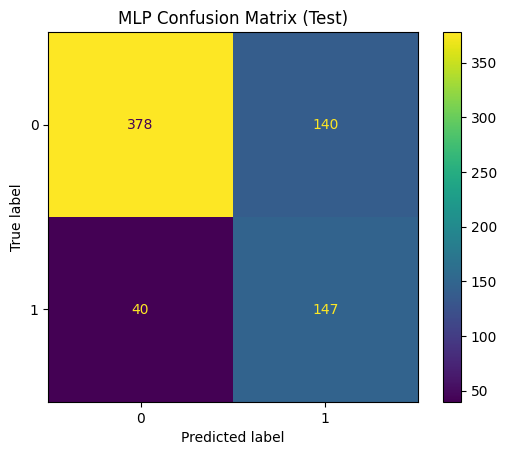

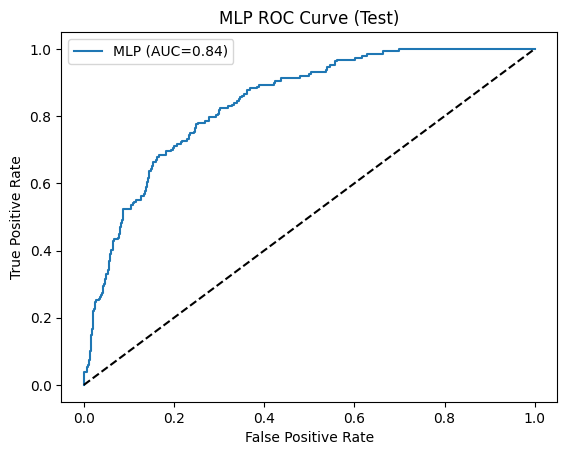

In [33]:
# Multi-Layer Perceptron (MLP) with Optuna hyperparameter tuning
from tensorflow.keras.callbacks import EarlyStopping

def create_mlp_model(trial):
    n_layers = trial.suggest_int('n_layers', 2, 4)
    n_units = trial.suggest_int('n_units', 32, 128)
    lr = trial.suggest_float('lr', 1e-4, 1e-2, log=True)
    dropout = trial.suggest_float('dropout', 0.0, 0.5)
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_proc.shape[1],)))
    for _ in range(n_layers):
        model.add(layers.Dense(n_units, activation='relu'))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss=losses.BinaryCrossentropy(), metrics=['accuracy', metrics.AUC(name='auc')])
    return model

def objective_mlp(trial):
    model = create_mlp_model(trial)
    early_stop = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
    history = model.fit(
        X_train_proc, y_train,
        validation_data=(X_val_proc, y_val),
        epochs=30,
        batch_size=trial.suggest_int('batch_size', 32, 128),
        verbose=0,
        class_weight=class_weight_dict,
        callbacks=[early_stop]
    )
    val_auc = max(history.history.get('val_auc', [0]))
    return 1 - val_auc

study_mlp = optuna.create_study(direction='minimize', sampler=optuna.samplers.TPESampler(seed=SEED))
study_mlp.optimize(objective_mlp, n_trials=20, show_progress_bar=True)

# Train best MLP model
best_params_mlp = study_mlp.best_params
best_mlp = create_mlp_model(optuna.trial.FixedTrial(best_params_mlp))
early_stop_final = EarlyStopping(monitor='val_auc', patience=5, mode='max', restore_best_weights=True)
best_mlp.fit(
    X_train_proc, y_train,
    validation_data=(X_val_proc, y_val),
    epochs=30,
    batch_size=best_params_mlp['batch_size'],
    verbose=0,
    class_weight=class_weight_dict,
    callbacks=[early_stop_final]
)
# Evaluate on test set
pred_test_mlp = best_mlp.predict(X_test_proc).ravel()
pred_test_label_mlp = (pred_test_mlp > 0.5).astype(int)
cm_mlp = confusion_matrix(y_test, pred_test_label_mlp)
roc_auc_mlp = roc_auc_score(y_test, pred_test_mlp)
f1_mlp = f1_score(y_test, pred_test_label_mlp)
precision_mlp = precision_score(y_test, pred_test_label_mlp)
recall_mlp = recall_score(y_test, pred_test_label_mlp)
specificity_mlp = cm_mlp[0,0] / (cm_mlp[0,0] + cm_mlp[0,1]) if (cm_mlp[0,0] + cm_mlp[0,1]) > 0 else 0
accuracy_mlp = (cm_mlp[0,0] + cm_mlp[1,1]) / cm_mlp.sum()

print('MLP Test Results:')
print(f'Accuracy: {accuracy_mlp:.4f}')
print(f'F1 Score: {f1_mlp:.4f}')
print(f'Precision: {precision_mlp:.4f}')
print(f'Recall (Sensitivity): {recall_mlp:.4f}')
print(f'Specificity: {specificity_mlp:.4f}')
print(f'AUC: {roc_auc_mlp:.4f}')

# Plot Confusion Matrix (Test)
ConfusionMatrixDisplay(cm_mlp).plot()
plt.title('MLP Confusion Matrix (Test)')
plt.show()

# Plot ROC Curve (Test)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, pred_test_mlp)
plt.figure()
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC={roc_auc_mlp:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve (Test)')
plt.legend()
plt.show()